# Example: The Newton method for finding roots of functions 

The Newton method is an iterative method to solve equations of the form $f(x)=0$, i.e. to find *roots* or *zeros* $x^\ast$ such that $f(x^\ast) = 0$. Given an initial guess $x_0$, we repeat the iteration

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

## Variables

Let's implement the Newton algorithm in Julia. We start from an initial condition $x_0$:

In [1]:
x_0 = 3

3

Julia always returns a value from any expression:

In [2]:
x_0

3

We can use LaTeX notation and tab completion for Unicode, e.g. `x\_0<TAB>`:

In [4]:
x₀ = 4

4

In [5]:
x₀

4

In [6]:
x_0

3

Values in Julia have associated **types**. We can find the type of a variable using the appropriately-named `typeof` function:

In [7]:
typeof(x₀)

Int64

We can guess that this means an integer with 64 bits. [This result will be `Int32` if you have a 32-bit machine.]

## Simple functions 

We need to define a function whose roots we wish to find. Let's find square roots of two, for example. Julia provides a concise mathematical syntax for defining simple functions:

In [8]:
f(x) = x^2 - 2

f (generic function with 1 method)

In [9]:
f

f (generic function with 1 method)

In [10]:
f(x_0)

7

We also need the derivative function, $f'$. For the moment, let's just give it my hand. (Later, we will see a neat way to avoid this.) We may like to write `f'`, using the apostrophe, `'`), but the apostrophe turns out to be a special character in Julia, so we get an error if we try to define a variable or function named `f'`:

In [11]:
f'(x) = 2x

LoadError: syntax: invalid method name "f'"
while loading In[11], in expression starting on line 1

However, Unicode comes to our rescue: `f\prime<TAB>`:

In [12]:
f′(x) = 2x

f′ (generic function with 1 method)

In [15]:
x² = x_0^2

9

Now we can do one step of our algorithm; mathematical operations work like we expect:

In [17]:
f(x_0)

7

In [18]:
typeof(ans)

Int64

In [16]:
x_1 = x_0 - f(x_0) / f′(x_0)

1.8333333333333333

Note that division of integers using `/` gives a floating-point result:

In [19]:
typeof(x_1)

Float64

In [20]:
4/2

2.0

In [21]:
div(4, 2)

2

In [22]:
div(5, 2)

2

In [26]:
x = 2^62

4611686018427387904

In [27]:
bits(x)

"0100000000000000000000000000000000000000000000000000000000000000"

In [28]:
x = x* 2

-9223372036854775808

In [29]:
bits(x)

"1000000000000000000000000000000000000000000000000000000000000000"

## Big integers 

In [30]:
x = big(2)

2

In [31]:
typeof(x)

BigInt (constructor with 10 methods)

In [32]:
x = big(2)^62

4611686018427387904

In [35]:
x *= 2

18446744073709551616

In [37]:
x = big(2^63)

-9223372036854775808

In [38]:
x = big(2)^63

9223372036854775808

In [39]:
big(2)^2^2^2

65536

In [40]:
big(2)^2^2^2^2

2003529930406846464979072351560255750447825475569751419265016973710894059556311453089506130880933348101038234342907263181822949382118812668869506364761547029165041871916351587966347219442930927982084309104855990570159318959639524863372367203002916969592156108764948889254090805911457037675208500206671563702366126359747144807111774815880914135742720967190151836282560618091458852699826141425030123391108273603843767876449043205960379124490905707560314035076162562476031863793126484703743782954975613770981604614413308692118102485959152380195331030292162800160568670105651646750568038741529463842244845292537361442533614373729088303794601274724958414864915930647252015155693922628180691650796381064132275307267143998158508811292628901134237782705567421080070065283963322155077831214288551675554073345107213112427399562982719769150054883905223804357045848197956393157853510018992000024141963706813559840464039472194016069517690156119726982337890017641517190051133466306898140219383481435426387306539552

In [41]:
length(string(ans))

19729

## Iteration 

We now need to repeat such steps several times. Julia has `for` loops and `while` loops. As usual, we tend to use `for` loops when we know how many iterations we want, and `while` when we iterate until a certain condition is attained. 

### Ranges and arrays

Let's start with a simple `for`. Blocks of code in Julia *always* end with `end`:

In [43]:
for i in 1:5
    println(i)  # print the value of i followed by a new line
end

1
2
3
4
5


Here, a variable `i` is introduced that is *local* to the loop, i.e. it exists only inside the loop:

In [44]:
i

LoadError: i not defined
while loading In[44], in expression starting on line 1

`i` takes each value in the *iterable collection* `1:5`. Let's ask Julia what this object `1:5` is:

In [45]:
1:5

1:5

As usual, Julia returns a value, but in this case it is (at first glance) apparently not very helpful. What type is this object?

In [46]:
typeof(1:5)

UnitRange{Int64} (constructor with 1 method)

We see that Julia has a special type (actually, several different types) to represent **ranges**, in which the elements are calculated each time a new element is required, rather than stored. We can see all the elements that will be produced using the `collect` function:

In [47]:
v = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

The result is an object of a new type, an `Array`, in this case one whose elements are integers and that is of *dimension* 1. Note that `1` is *not* the number of elements in the array, which is called `length`:

In [48]:
length(v)

5

`Array`s are also iterable, so we can iterate over an `Array` using a `for` loop. 1-dimensional arrays, also called `Vector`s, are constructed using square brackets:

In [49]:
w = [3, 4, 7]

3-element Array{Int64,1}:
 3
 4
 7

In [50]:
for i in w
    println(2*i)
end

6
8
14


## Implementing the Newton method 

We are now ready to implement the Newton method:

In [53]:
x_0 = 3
x = x_0

for i in 1:10
    x_new = x - f(x) / f′(x)
    println(i, "\t", x_new)
    x = x_new
end
    

1	1.8333333333333333
2	1.4621212121212122
3	1.4149984298948028
4	1.4142137800471977
5	1.4142135623731118
6	1.414213562373095
7	1.4142135623730951
8	1.414213562373095
9	1.4142135623730951
10	1.414213562373095


In this case, we see that the method rapidly converges to one of the square roots of two. Which root it converges to depends on the initial condition:

In [ ]:
x_0 = -3
x = x_0

for i in 1:10
    x_new = x - f(x) / f′(x)
    println(i, "\t", x_new)
    x = x_new
end

The Newton method is, in fact, not guaranteed to converge to a root (although it always does so if started "sufficiently close" to a root, at a rate that is known). Furthermore, *which* root it converges to can depend sensitively on the initial condition. Let's calculate this for several initial conditions.

First we create a set of initial conditions on the real line, say between -5 and 5. We now include a step size in the range:

In [55]:
initial_conditions = -5:0.125:5
collect(initial_conditions)   # use tab completion for long variable names!

81-element Array{Float64,1}:
 -5.0  
 -4.875
 -4.75 
 -4.625
 -4.5  
 -4.375
 -4.25 
 -4.125
 -4.0  
 -3.875
 -3.75 
 -3.625
 -3.5  
  ⋮    
  3.625
  3.75 
  3.875
  4.0  
  4.125
  4.25 
  4.375
  4.5  
  4.625
  4.75 
  4.875
  5.0  

In [56]:
showall(collect(initial_conditions))

[-5.0,-4.875,-4.75,-4.625,-4.5,-4.375,-4.25,-4.125,-4.0,-3.875,-3.75,-3.625,-3.5,-3.375,-3.25,-3.125,-3.0,-2.875,-2.75,-2.625,-2.5,-2.375,-2.25,-2.125,-2.0,-1.875,-1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,1.125,1.25,1.375,1.5,1.625,1.75,1.875,2.0,2.125,2.25,2.375,2.5,2.625,2.75,2.875,3.0,3.125,3.25,3.375,3.5,3.625,3.75,3.875,4.0,4.125,4.25,4.375,4.5,4.625,4.75,4.875,5.0]

This range type is different:

In [57]:
typeof(-5:0.1:5)

FloatRange{Float64} (constructor with 1 method)

The array is also a new type: it is now an array of 64-bit floating-point numbers. We can also see that the `{...}` syntax thus gives the **parameters** of the `Array` type.

For each of these initial conditions, we will run the Newton algorithm for a certain number of steps and store the resulting value. We thus need a new array in which to store the results. One way of creating an array is using the `similar` function, which, by default, creates an array of the same type and same size, but with (currently) uninitialized values:

In [58]:
length(initial_conditions)

81

In [59]:
roots = similar(initial_conditions)

81-element Array{Float64,1}:
 2.65533e-312
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 ⋮           
 2.89881e-57 
 1.32359e6   
 5.12836e15  
 2.65533e-312
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         

Now we do the work:

In [60]:
enumerate(initial_conditions)

Enumerate{FloatRange{Float64}}(-5.0:0.125:5.0)

In [61]:
#for (j, x_0) in enumerate(initial_conditions)
for j in 1:length(initial_conditions)
    x_0 = initial_conditions[j]
    
    x = x_0

    for i in 1:100
        x = x - f(x) / f′(x)
    end
    
    roots[j] = x
end

Here, `enumerate` iterates over `initial_conditions` but returns not only the value at each step, but also a counter. `(j, x_0`) is called a **tuple** (an ordered pair):

In [63]:
for (j, x_0) in enumerate([3, 17, -100])
    @show (j, x_0)
end

(j,x_0) => (1,3)
(j,x_0) => (2,17)
(j,x_0) => (3,-100)


In [62]:
t = (3, 4)
typeof(t)

(Int64,Int64)

NB: In Julia v0.4, tuples have been completely reworked, and the resulting type is now
`Tuple{Int64,Int64}`.

In [64]:
roots

81-element Array{Float64,1}:
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
  ⋮      
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421

Julia does not show all of the contents of an array by default. We can see everything using `showall`:

In [65]:
showall(roots)

[-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.414213562373095,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,NaN,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.414213562373095,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.41

We see that, apart from the `NaN` value, the results are not very exciting. Let's work harder with more initial conditions. We can find out how long the calculation takes using `@time` by wrapping the code in a `begin...end` block:


In [66]:
@time begin 
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
end

elapsed time: 5.704973206 seconds (1605016232 bytes allocated, 15.37% gc time)


## Packages and visualisation 

There are now many values stored in the array, so it is hopeless to examine them:

In [67]:
length(roots)

20001

Instead, we turn to **visualisation**. There are several plotting **packages** in Julia: [`Gadfly`]() is a native Julia library that produces beautiful plots; [`PyPlot`] is a Julian interface to the well-known `matplotlib` Python library. 

Let's start with `PyPlot`. First we need to download the package. Julia provides a built-in package manager, called `Pkg`, that gracefully handles dependencies, etc. To tell Julia that we require the package, we do

In [68]:
"PyPlot"

"PyPlot"

In [69]:
typeof(ans)

ASCIIString (constructor with 2 methods)

In [70]:
"α"

"α"

In [71]:
typeof(ans)

UTF8String (constructor with 2 methods)

In [73]:
Pkg.add("Graphs")

INFO: Cloning cache of Graphs from git://github.com/JuliaLang/Graphs.jl.git
INFO: Installing Graphs v0.5.4
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Graphs
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [72]:
Pkg.add("PyPlot")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


This step is necessary only once. In each session where we need to use `PyPlot` we do

In [74]:
;ls ~/.julia/

v0.3
v0.4


In [75]:
;ls ~/.julia/v0.3

ArrayViews
BilliardModels
BinDeps
Cairo
Calculus
Codecs
Color
Compat
Compose
Contour
Coverage
DataArrays
DataFrames
DataStructures
Dates
Distances
Distributions
Docile
DualNumbers
FactCheck
FastAnonymous
FixedPointNumbers
GZip
Gadfly
GnuTLS
Graphics
Graphs
Grid
Hexagons
Homebrew
HttpCommon
HttpParser
IJulia
ImageView
Images
ImmutableArrays
IniFile
Interact
Iterators
JSON
Jewel
JuliaCon
JuliaParser
KernelDensity
LNR
LaTeXStrings
Lazy
Lexicon
Loess
METADATA
NaNMath
Nettle
ODE
Optim
Orsay
PDMats
Polynomials
ProfileView
PyCall
PyPlot
RCall
REPLCompletions
REQUIRE
Reactive
Reexport
Requests
Requires
SHA
SIUnits
Showoff
SortingAlgorithms
StatsBase
SymPy
TaylorSeries
TexExtensions
Tk
URIParser
ValidatedNumerics
Winston
WoodburyMatrices
ZMQ
Zlib
untitled-1.jl


In [76]:
using PyPlot

INFO: Loading help data...


Note that this process of loading a package currently can take a considerable time. Work is in progress to reduce this loading time.

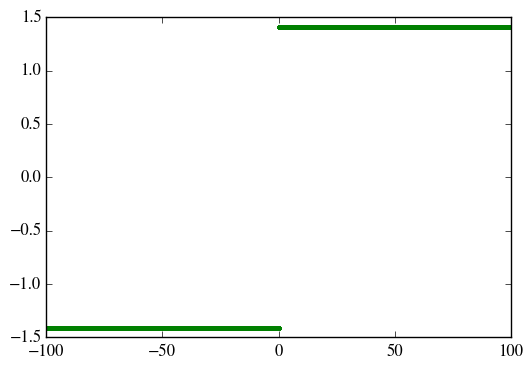

In [81]:
figure(figsize=(6,4))
plot(initial_conditions, roots, "g.");

## Performance 1 

If we are used to the performance of C or Fortran, we might start to be unhappy with Julia's speed in this rather simple calculation. A close inspection of the output of the `@time` operation, however, gives us a very important clue: Julia apparently allocated over a gigabyte of memory to do a simple loop with some floating-point numbers! 

This is almost *always* a very strong signal that there is something very wrong in your Julia code! In our case, it is not at all clear what that could be. It turns out to be something very fundamental in Julia: 

[almost] **NEVER WORK WITH GLOBAL OBJECTS!**

Due to technical details about the way that Julia works, it turns out that **GLOBALS ARE BAD**. What is the solution? **PUT EVERYTHING INTO A FUNCTION!** Let's try following this advice. We take *exactly* the same code and just plop it into a new function. For longer functions, Julia has an alternative syntax:

In [102]:
function do_roots()
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
    
    initial_conditions, roots
end

do_roots (generic function with 1 method)

In [91]:
f(x) = x*a

f (generic function with 1 method)

In [92]:
f(3)

LoadError: a not defined
while loading In[92], in expression starting on line 1

In [93]:
a = 10

10

In [94]:
f(3)

30

In [95]:
a = 100
f(3)

300

In [89]:
do_roots()

(-100.0:0.01:100.0,[-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421  …  1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421])

In [90]:
typeof(ans)

(FloatRange{Float64},Array{Float64,1})

In [87]:
whos()

Base                          Module
Color                         Module
Compat                        Module
Core                          Module
DataStructures                Module
Dates                         Module
Docile                        Module
FixedPointNumbers             Module
IJulia                        Module
IPythonDisplay                Module
JSON                          Module
LaTeXStrings                  Module
Main                          Module
Nettle                        Module
PyCall                        Module
PyPlot                        Module
ZMQ                           Module
do_roots                      Function
f                             Function
f′                            Function
initial_conditions            20001-element FloatRange{Float64}
roots                         20001-element Array{Float64,1}
t                             (Int64,Int64)
v                             5-element Array{Int64,1}
w                             

Note the last line of the function. This will automatically *return* the value of the `roots` object as the output of the function. So we can call it like this:

In [84]:
roots = do_roots();

Now how long did it take?

In [103]:
# a semi-colon suppresses output
@time roots = do_roots();  
@time roots = do_roots();  

elapsed time: 0.197401653 seconds (443720 bytes allocated)
elapsed time: 0.179541769 seconds (160384 bytes allocated)


It allocates a million times less memory, and is 50 times faster! This is the first lesson about performance in Julia: *always* put everything in a function.

Note that the first time we ran the function, it took longer. This is due to the fact that the first time a function is run with arguments of given types, the function is *compiled*. Subsequent runs with the same types of arguments reuse the previously-compiled code.

**Exercise**: Use a `while` loop with a suitable condition to improve the code for the Newton method.

In [99]:
f(x) = x^2 - 2

f (generic function with 1 method)

In [104]:
function do_roots2()
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for j in 1:length(initial_conditions)
        x = initial_conditions[j]

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
    
    initial_conditions, roots
end

do_roots2 (generic function with 1 method)

In [105]:
do_roots2()

(-100.0:0.01:100.0,[-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421  …  1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421])

In [106]:
@time do_roots2()

elapsed time: 0.181574599 seconds (160384 bytes allocated)


(-100.0:0.01:100.0,[-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421,-1.41421  …  1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421,1.41421])

## Generic functions and methods

Our code currently is not very flexible. To make it more flexible, we would like to pass in arguments to the `do_roots` function. We can make a version which takes as arguments the functions `f` and `f'`, for example. Functions are "first-class objects" in Julia, so they can just be passed around by name.

Let's redefine our function `do_roots` to accept these arguments:

In [109]:
function do_roots(f, f′)
    println("Version with 2 arguments")
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
    
    roots
end

do_roots (generic function with 2 methods)

Note the output that Julia returns: "generic function with 2 methods". This is a sign that something interesting is happening. In fact, we have not "redefined" the function `do_roots`; rather, we have defined a *new version* of `do_roots`, which accepts a *different set of arguments*. (The collection *and types* of the arguments that a function accepts are called its **type signature**.)

Indeed, the function `do_roots` now has *two different methods* or versions:

In [108]:
methods(do_roots)

# 2 methods for generic function "do_roots":
do_roots() at In[102]:2
do_roots(f,f′) at In[107]:2

If we call `do_roots` with no arguments, the first version will be used; calling it with two arguments will call the second version. The process of choosing which "version" of a function to call is called *dispatch*. The fundamental fact in Julia is that (almost) all functions are such "generic functions" with multiple version, i.e. Julia is one of very few languages that use **multiple dispatch**. This turns out to be very natural for many applications in scientific computing.

The arguments `f` and `f'` in the second method of `do_roots` are names that are local to the function. We have functions of the same name defined globally, so we can pass those in:

In [110]:
@time do_roots(f, f′);

Version with 2 arguments
elapsed time: 3.673329028 seconds (1281192644 bytes allocated, 27.32% gc time)


This is faster than the first version of `do_roots`, but much slower than the good version. It turns out that Julia currently *cannot optimize* (inline) functions passed in this way. This is something to bear in mind -- there is (currently) a trade-off between user convenience and speed.

Julia also has *anonymous* functions, which allow us to pass in a function that we define "in the moment", without giving it a name. For example, let's do the exercise with a more interesting function:

In [121]:
@time roots = do_roots(x->(x-1)*(x-2)*(x-3), x->3x^2-12x+11);

Version with 2 arguments
elapsed time: 12.473792787 seconds (3520989320 bytes allocated, 22.39% gc time)


In [111]:
h(x) = x^2

h (generic function with 1 method)

In [112]:
h(3)

9

In [113]:
h(3.5)

12.25

In [114]:
h(x::Float64) = x^3

h (generic function with 2 methods)

In [115]:
h(3)

9

In [116]:
h(3.5)

42.875

In [117]:
methods(h)

# 2 methods for generic function "h":
h(x::Float64) at In[114]:1
h(x) at In[111]:1

In [118]:
abs(-3)

3

In [119]:
abs(3 + 4im)

5.0

In [120]:
methods(abs)

# 22 methods for generic function "abs":
abs(x::Bool) at bool.jl:28
abs(x::Unsigned) at int.jl:74
abs(x::Signed) at int.jl:75
abs(x::Float64) at float.jl:207
abs(x::Float32) at float.jl:208
abs(x::Float16) at float16.jl:130
abs{f}(x::Fixed32{f}) at /Users/dsanders/.julia/v0.3/FixedPointNumbers/src/fixed32.jl:28
abs(x::Ufixed) at /Users/dsanders/.julia/v0.3/FixedPointNumbers/src/ufixed.jl:82
abs(x::Real) at number.jl:24
abs(z::Complex{T<:Real}) at complex.jl:103
abs(B::BitArray{N}) at bitarray.jl:783
abs(A::SparseMatrixCSC{Tv,Ti<:Integer}) at sparse/sparsematrix.jl:494
abs(f::Array{FieldValue,1}) at pkg/resolve/fieldvalue.jl:62
abs{T<:Number}(::AbstractArray{T<:Number,1}) at operators.jl:359
abs{T<:Number}(::AbstractArray{T<:Number,2}) at operators.jl:360
abs{T<:Number}(::AbstractArray{T<:Number,N}) at operators.jl:362
abs{T}(a::HierarchicalValue{T}) at pkg/resolve/versionweight.jl:65
abs(a::VWPreBuildItem) at pkg/resolve/versionweight.jl:93
abs(a::VWPreBuild) at pkg/resolve/versionweight.jl:146
abs(a::VersionWeight) at pkg/resolve/versionweight.jl:202
abs(a::FieldValue) at pkg/resolve/fieldvalue.jl:61
abs{T<:Period}(a::T<:Period) at /Users/dsanders/.julia/v0.3/Dates/src/dates/periods.jl:72

We see that anonymous functions are currently very slow. However, there are workarounds, e.g. the `FastAnonymous` package.

In [122]:
using FastAnonymous

In [ ]:
f1 = @anon x->(x-1)*(x-2)*(x-3)
f2 = @anon x->3x^2-12x+11

In [125]:
@time roots = do_roots(f1, f2);

Version with 2 arguments
elapsed time: 3.134365495 seconds (1280869488 bytes allocated, 32.19% gc time)


Let's visualize the results for this function:

In [ ]:
figure(figsize=(6,4))
plot(-100:0.01:100, roots)
xlim()

In [ ]:
figure(figsize=(6,4))
plot(-100:0.01:100, roots)
xlim(1, 3)

## Complexifying Newton 

The previous result is still pretty boring. It turns out that the Newton method gets interesting if we look for roots of functions of *complex* numbers. [If you are not familiar with complex numbers, you can think of them as pairs of real numbers that have certain mathematical operations defined.]

Let's try to use the Newton method starting from initial conditions distributed in the complex plane, i.e. pairs $a + bi$, where $i = \sqrt{-1}$. First of all let's see how Julia handles complex numbers:

In [127]:
sqrt(-1.0)

LoadError: DomainError
while loading In[127], in expression starting on line 1

Oh dear, that didn't work very well. It turns out that Julia is carefully designed to respect, when possible, the type of the input argument. Indeed, let's ask Julia what it thinks `sqrt` means:

In [ ]:
sqrt

We see that `sqrt` is a generic function, with the following methods:

In [128]:
methods(sqrt)

# 12 methods for generic function "sqrt":
sqrt(a::Complex{Float16}) at float16.jl:141
sqrt{T<:FloatingPoint}(z::Complex{T<:FloatingPoint}) at complex.jl:237
sqrt(z::Complex{T<:Real}) at complex.jl:261
sqrt(x::Float64) at math.jl:131
sqrt(x::Float32) at math.jl:132
sqrt(a::Float16) at float16.jl:140
sqrt(x::BigFloat) at mpfr.jl:285
sqrt(x::BigInt) at mpfr.jl:293
sqrt(x::Real) at math.jl:133
sqrt{T<:Number}(::AbstractArray{T<:Number,1}) at operators.jl:359
sqrt{T<:Number}(::AbstractArray{T<:Number,2}) at operators.jl:360
sqrt{T<:Number}(::AbstractArray{T<:Number,N}) at operators.jl:362

Julia gives us a list of the available methods, together with links direct to the source code on GitHub (in IJulia) or locally (in Juno).

`sqrt()` acting on a `Float64` returns a `Float64` when it can, or throws a `DomainError` when its argument is negative. To get square roots in the complex plane, we must *start* with a complex number.

The names of types in Julia start with capital letters, so let's try `Complex`:

In [129]:
Complex

Complex{T<:Real} (constructor with 3 methods)

In [131]:
Real

Real

In [132]:
typeof(ans)

DataType

In [133]:
subtypes(Real)

5-element Array{Any,1}:
 FixedPoint          
 FloatingPoint       
 Integer             
 MathConst{sym}      
 Rational{T<:Integer}

In [ ]:
x::Real

As we will see later, types have functions with the same name that act as **constructors** to make objects of the type. Let's see the available functions with the name `Complex`. Note that output has changed rather a lot between Julia v0.3 and Julia v0.4:

In [134]:
methods(Complex)

# 3 methods for generic function "Complex":
Complex{T<:Real}(re::T<:Real,im::T<:Real)
Complex(x::Real,y::Real) at complex.jl:5
Complex(x::Real) at complex.jl:6

Now let's try playing with `Complex`:

In [135]:
a = Complex(3)

3 + 0im

In [136]:
typeof(a)

Complex{Int64} (constructor with 1 method)

In [137]:
b = Complex(3, 4.5)

3.0 + 4.5im

In [138]:
typeof(b)

Complex{Float64} (constructor with 1 method)

We see that `Complex` is also parametrised by the type of its real and imaginary parts.

We can also make complex numbers directly using `im`:

In [141]:
x = 2

2

In [142]:
3x

6

In [143]:
3.0 + 4.0im

3.0 + 4.0im

(Here, 4.0im is multiplication of 4.0 by `im`, which represents $i$, the imaginary unit.)

We can do complex arithmetic:

In [144]:
a * b

9.0 + 13.5im

What is happening here? Julia knows how to do `*` for complex numbers. Let's ask Julia what `*` is:

In [145]:
*

* (generic function with 125 methods)

In [146]:
methods(*)

# 125 methods for generic function "*":
*(x::Bool,y::Bool) at bool.jl:41
*{T<:Unsigned}(x::Bool,y::T<:Unsigned) at bool.jl:56
*(x::Bool,z::Complex{T<:Real}) at complex.jl:116
*{T<:Number}(x::Bool,y::T<:Number) at bool.jl:52
*(z::Complex{T<:Real},x::Bool) at complex.jl:117
*(y::Number,x::Bool) at bool.jl:58
*{T,S}(A::Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2}),B::Union(DenseArray{S,2},SubArray{S,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)})) at linalg/matmul.jl:116
*(A::Union(Symmetric{T},Hermitian{T}),B::Union(Symmetric{T},Hermitian{T})) at linalg/symmetric.jl:35
*(A::Union(Symmetric{T},Hermitian{T}),B::Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2})) at linalg/symmetric.jl:36
*(A::Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2}),B::Union(Symmetric{T},Hermitian{T})) at linalg/symmetric.jl:37
*{T<:Union(Float64,Complex{Float32},Float32,Complex{Float64}),S<:Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2}),UpLo,IsUnit}(A::Triangular{T<:Union(Float64,Complex{Float32},Float32,Complex{Float64}),S<:Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2}),UpLo,IsUnit},B::Triangular{T<:Union(Float64,Complex{Float32},Float32,Complex{Float64}),S<:Union(SubArray{T,2,A<:DenseArray{T,N},I<:(Union(Int64,Range{Int64})...,)},DenseArray{T,2}),UpLo,IsUnit}) at linalg/triangular.jl:23
*(A::Tridiagonal{T},B::Triangular{T,S<:AbstractArray{T,2},UpLo,IsUnit}) at linalg/triangular.jl:206
*{TA,TB,SA<:AbstractArray{T,2},SB<:AbstractArray{T,2},UpLoA,UpLoB,IsUnitA,IsUnitB}(A::Triangular{TA,SA<:AbstractArray{T,2},UpLoA,IsUnitA},B::Triangular{TB,SB<:AbstractArray{T,2},UpLoB,IsUnitB}) at linalg/triangular.jl:209
*(Da::Diagonal{T},Db::Diagonal{T}) at linalg/diagonal.jl:53
*(A::Union(Diagonal{T},Triangular{T,S<:AbstractArray{T,2},UpLo,IsUnit},Bidiagonal{T},Tridiagonal{T},SymTridiagonal{T}),B::Union(Diagonal{T},Triangular{T,S<:AbstractArray{T,2},UpLo,IsUnit},Bidiagonal{T},Tridiagonal{T},SymTridiagonal{T})) at linalg/bidiag.jl:114
*{T<:Union(Int8,Int16,Int32)}(x::T<:Union(Int8,Int16,Int32),y::T<:Union(Int8,Int16,Int32)) at int.jl:18
*{T<:Union(Uint8,Uint16,Uint32)}(x::T<:Union(Uint8,Uint16,Uint32),y::T<:Union(Uint8,Uint16,Uint32)) at int.jl:22
*(x::Int64,y::Int64) at int.jl:47
*(x::Uint64,y::Uint64) at int.jl:48
*(x::Int128,y::Int128) at int.jl:586
*(x::Uint128,y::Uint128) at int.jl:587
*(x::Float32,y::Float32) at float.jl:123
*(x::Float64,y::Float64) at float.jl:124
*(z::Complex{T<:Real},w::Complex{T<:Real}) at complex.jl:112
*(x::Real,z::Complex{T<:Real}) at complex.jl:118
*(z::Complex{T<:Real},x::Real) at complex.jl:119
*(x::Rational{T<:Integer},y::Rational{T<:Integer}) at rational.jl:118
*(a::Float16,b::Float16) at float16.jl:132
*(x::BigInt,y::BigInt) at gmp.jl:195
*(a::BigInt,b::BigInt,c::BigInt) at gmp.jl:218
*(a::BigInt,b::BigInt,c::BigInt,d::BigInt) at gmp.jl:224
*(a::BigInt,b::BigInt,c::BigInt,d::BigInt,e::BigInt) at gmp.jl:231
*(x::BigInt,c::Union(Uint8,Uint64,Uint16,Uint32)) at gmp.jl:265
*(c::Union(Uint8,Uint64,Uint16,Uint32),x::BigInt) at gmp.jl:269
*(x::BigInt,c::Union(Int8,Int16,Int32,Int64)) at gmp.jl:271
*(c::Union(Int8,Int16,Int32,Int64),x::BigInt) at gmp.jl:275
*(x::BigFloat,y::BigFloat) at mpfr.jl:149
*(x::BigFloat,c::Union(Uint8,Uint64,Uint16,Uint32)) at mpfr.jl:156
*(c::Union(Uint8,Uint64,Uint16,Uint32),x::BigFloat) at mpfr.jl:160
*(x::BigFloat,c::Union(Int8,Int16,Int32,Int64)) at mpfr.jl:164
*(c::Union(Int8,Int16,Int32,Int64),x::BigFloat) at mpfr.jl:168
*(x::BigFloat,c::Union(Float64,Float32,Float16)) at mpfr.jl:172
*(c::Union(Float64,Float32,Float16),x::BigFloat) at mpfr.jl:176
*(x::BigFloat,c::BigInt) at mpfr.jl:180
*(c::BigInt,x::BigFloat) at mpfr.jl:184
*(a::BigFloat,b::BigFloat,c::BigFloat) at mpfr.jl:255
*(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloat) at mpfr.jl:261
*(a::BigFloat,b::BigFloat,c::BigFloat,d::BigFloa

So, mathematical operators *are generic functions too*! We can list all the ways to do `*`:

In [ ]:
methods(*)

All of these are defined in Julia itself. (Although the definitions for basic types like `Int` are only shallow wrappers around underlying C code.) We see that generic functions can be a complicated "patchwork" made of different methods for different types.

We can find the exact method used for a given operation using `@which`:

In [147]:
@which a * b

*(z::Complex{T<:Real},w::Complex{T<:Real}) at complex.jl:112

In [151]:
hello(x, y) = x + y

hello (generic function with 1 method)

In [152]:
hello(1, 2)

3

In [154]:
hello([1, 2]...)  # splatting operator ...

3

In [155]:
hello((1,2)...)

3

## Initial conditions: matrices

We are now ready to think about how to generate a grid of initial conditions of the form $a+bi$ in the complex plane, $\mathbb{C}$. Firstly, we could just iterate over the initial conditions in two repeated `for`s, e.g.

In [156]:
for i in -2:1
    for j in -2:1
        println("($i, $j)")
    end
end

(-2, -2)
(-2, -1)
(-2, 0)
(-2, 1)
(-1, -2)
(-1, -1)
(-1, 0)
(-1, 1)
(0, -2)
(0, -1)
(0, 0)
(0, 1)
(1, -2)
(1, -1)
(1, 0)
(1, 1)


In [157]:
for i in -2:1, j in -2:1
    println("($i, $j)")

end

(-2, -2)
(-2, -1)
(-2, 0)
(-2, 1)
(-1, -2)
(-1, -1)
(-1, 0)
(-1, 1)
(0, -2)
(0, -1)
(0, 0)
(0, 1)
(1, -2)
(1, -1)
(1, 0)
(1, 1)


Here we have used **string interpolation**: the *value* of the variable `i` is substituted into the string instead of the sequence `$i$`. [Note that this is not recommended for performance-critical applications.]

But we still require somewhere to store the results. It is natural to use a **matrix**. A simple way of generating a matrix is the `zeros` function:

In [158]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

We see that with a single element, we generate a *vector* of zeros, while

In [159]:
zeros(3, 3)

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

Length in each direction:

In [160]:
size(ans)

(3,3)

gives a *matrix*, i.e. a 2-dimensional `Array`.

Multiple dispatch allows Julia to provide convenience versions of functions like this. For example:

In [161]:
zeros(-3:2)

6-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0

creates a vector of the same length as the range!

However, this does not work for two different ranges:

In [162]:
zeros(-3:2, -3:2)

LoadError: `Array{T,N}` has no method matching Array{T,N}(::Type{Float64}, ::UnitRange{Int64}, ::UnitRange{Int64})
while loading In[162], in expression starting on line 1

We can use `length` for example:

In [163]:
linear_initial_conditions = -5:0.1:5
L = length(linear_initial_conditions)
roots = zeros(L, L)

101x101 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

However, if we try to store a complex number in this matrix, we find a problem:

In [164]:
roots[1, 1] = 3+4im

LoadError: InexactError()
while loading In[164], in expression starting on line 1

An `InexactError` is a sign that we are trying to put a value into a type that it "doesn't fit into", for example a `Float64` into an `Int64`, or, in this case, a complex number into a float. We must instead create the matrix to hold complex numbers:

In [165]:
linear_initial_conditions = -5:0.1:5
L = length(linear_initial_conditions)
roots = zeros(Complex128, L, L)

101x101 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮     

Here, `Complex128` is just an alias (an alternative name) for `Complex{Float64}`, so called because two 64-bit `Float64`s require `128` bits of storage in total.

Now we can insert complex values into the matrix:

In [167]:
roots[1, 1] = 3+4im

3 + 4im

In [168]:
roots

101x101 Array{Complex{Float64},2}:
 3.0+4.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮     

## Implementing Newton for complex functions 

We are now ready to make a version of Newton for complex functions. We will try to find cube roots of $1$ in the complex plane, by finding zeros of the function

In [1]:
f(z) = z^3 - 1

f (generic function with 1 method)

In [170]:
f(3)

26

In [171]:
f(3+4im)

-118 + 44im

with derivative

In [2]:
f′(z) = 3z^2

f′ (generic function with 1 method)

In [3]:
function do_complex_roots(range=-5:0.1:5)  # default value

    L = length(range)
    
    roots = zeros(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:100
                z = z - f(z) / f′(z)
            end

            roots[i,j] = z
        end
        
    end
    
    roots
end

do_complex_roots (generic function with 2 methods)

In [4]:
roots = do_complex_roots(-5:0.1:5)

101x101 Array{Complex{Float64},2}:
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
     ⋮                             ⋱      

Now let's use `PyPlot` to plot the result. `PyPlot` only understands floating-point matrices, so we'll take the imaginary part:

In [5]:
using PyPlot

INFO: Loading help data...


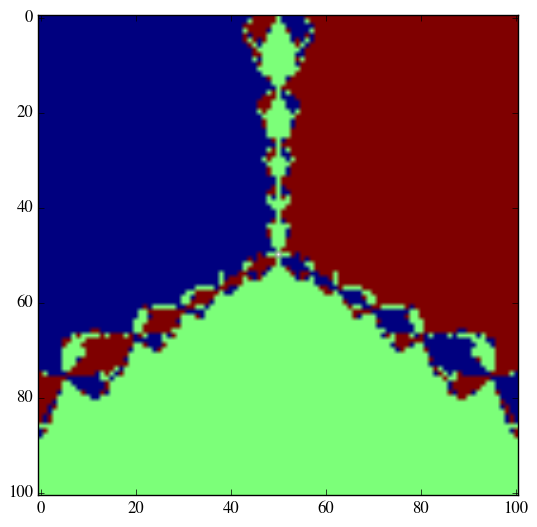

PyObject <matplotlib.image.AxesImage object at 0x118a8d2d0>

In [6]:
imshow(imag(roots))

Julia uses "column-major" storage, whereas Python uses "row-major", so in fact we need to flip $x$ and $y$:

In [7]:
function do_complex_roots(range=-5:0.1:5)  # default value

    L = length(range)
    
    roots = zeros(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = y + x*im
            
            for k in 1:100
                z = z - f(z) / f′(z)
            end

            roots[i,j] = z
        end
        
    end
    
    roots
end

do_complex_roots (generic function with 2 methods)

In [26]:
range = -3:0.01:3
@time do_complex_roots(range);

elapsed time: 1.190081941 seconds (5779344 bytes allocated)


In [10]:
?imshow

Display an image on the axes.

Parameters
-----------
X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
    Display the image in `X` to current axes.  `X` may be a float
    array, a uint8 array or a PIL image. If `X` is an array, it
    can have the following shapes:

    - MxN -- luminance (grayscale, float array only)
    - MxNx3 -- RGB (float or uint8 array)
    - MxNx4 -- RGBA (float or uint8 array)

    The value for each component of MxNx3 and MxNx4 float arrays
    should be in the range 0.0 to 1.0; MxN float arrays may be
    normalised.

cmap : `~matplotlib.colors.Colormap`, optional, default: None
    If None, default to rc `image.cmap` value. `cmap` is ignored when
    `X` has RGB(A) information

aspect : ['auto' | 'equal' | scalar], optional, default: None
    If 'auto', changes the image aspect ratio to match that of the
    axes.

    If 'equal', and `extent` is None, changes the axes aspect ratio to
    match that of the image. If `extent` is not `None`, the axes
 

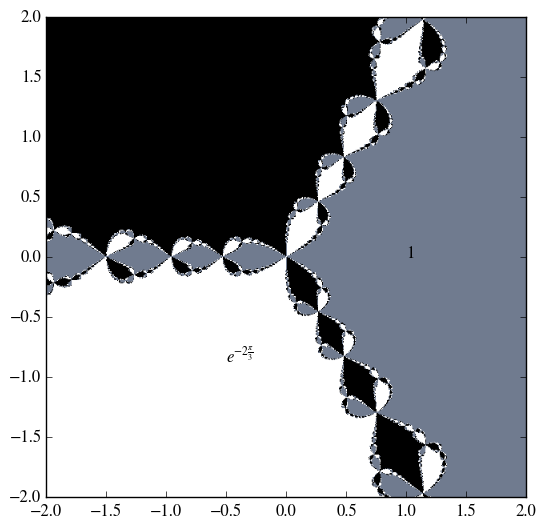

PyObject <matplotlib.text.Text object at 0x11e7994d0>

In [15]:
imshow(imag(do_complex_roots(-3:0.01:3)), extent=(-2, 2, -2, 2), cmap="bone")
text(1, 0, L"1")
text(reim(exp(2π*im/3))..., L"e^{2\frac{\pi}{3}}")
text(reim(exp(-2π*im/3))..., L"e^{-2\frac{\pi}{3}}")

## Array comprehensions 

Julia has a neat syntax for constructing arrays from iterables that is very similar to mathematical notation.
For example, the squares of the numbers from 1 to 10 is

$$\{x^2: x \in \{1,\ldots,10\} \},$$

i.e. "the set of $x^2$ for $x$ from $1$ to $10$. In Julia we can write

In [16]:
squares = [x^2 for x in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Let's define a Newton function by

In [18]:
function newton(x0, N=100)
    x = x0
    
    for i in 1:N
        x = x - f(x) / f′(x)
    end
    
    x
end
    

newton (generic function with 2 methods)

Then our Newton fractal can be written very concisely as

In [19]:
methods(newton)

# 2 methods for generic function "newton":
newton(x0) at In[18]:2
newton(x0,N) at In[18]:2

Note that the effect of a default argument is simply to create an additional method.

In [22]:
function newton_fractal(range)
    [newton(b+a*im) for a in range, b in range]
end

newton_fractal (generic function with 1 method)

In [27]:
@time newton_fractal(range)

elapsed time: 1.200306239 seconds (5779344 bytes allocated)


601x601 Array{Complex{Float64},2}:
 -0.5-0.866025im  -0.5-0.866025im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im  …  1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
 -0.5-0.866025im  -0.5-0.866025im     1.0+0.0im  1.0+0.0im  1.0+0.0im
     ⋮                             ⋱                   

We can add labels using PyPlot

In [ ]:
?text

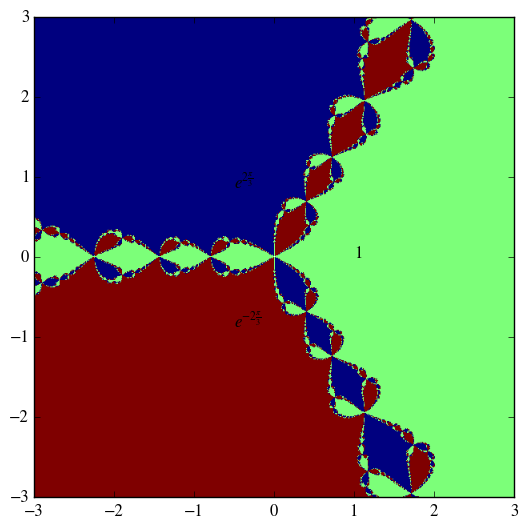

PyObject <matplotlib.text.Text object at 0x11d036950>

In [21]:
imshow(imag(newton_fractal(-3:0.01:3)), extent=(-3, 3, -3, 3))

text(1, 0, L"1")
text(reim(exp(2π*im/3))..., L"e^{2\frac{\pi}{3}}")
text(reim(exp(-2π*im/3))..., L"e^{-2\frac{\pi}{3}}")

Here, we have used Julia's `reim` function:

In [ ]:
reim(exp(2π*im/3))

It returns a tuple. The `...`, or *splat*, operator, unpacks the tuple into two arguments.
The `L"..."` notation is a special string macro available in the `LateXStrings` package used by `PyPlot`,
that makes a LaTeX string.

Exercise: Make a version that accepts functions and experiment with other complex polynomials. 

## Introspection and iteration protocol

How does Julia know how to iterate using `for` through a vector or range? Let's look at a Unicode string:

In [29]:
s = "aαbβ"  # use `\alpha<TAB>`

"aαbβ"

In [30]:
typeof(s)

UTF8String (constructor with 2 methods)

Julia provides access to several layers between the high-level code we write and the low-level machine code that is finally produced by the compilation process. The first of those is a "lowered" version of the code, in which high-level syntax is transformed to Julia code at a lower level

We see that there are three important functions: `start`, `next` and `done`.
For example, iterating through a Unicode `UTF8String` is complicated, since characters have different lengths:

In [34]:
s[1]

'a'

In [35]:
s[2]

'α'

In [36]:
s[3]

LoadError: invalid UTF-8 character index
while loading In[36], in expression starting on line 1

Nonetheless, we can iterate through `s`:

In [37]:
function string_iterate(s)
    for c in s
        println(c)
    end
end

string_iterate (generic function with 1 method)

In [38]:
string_iterate(s)

a
α
b
β


For example, we can extract a list of the characters in `s` with

In [44]:
chars = Char[c for c in s]

4-element Array{Char,1}:
 'a'
 'α'
 'b'
 'β'

In [43]:
f() = chars = Char[c for c in s]

f (generic function with 2 methods)

In [41]:
f()

4-element Array{Any,1}:
 'a'
 'α'
 'b'
 'β'

In [48]:
chars[2]

'α'

In [49]:
typeof(chars[2])

Char

Note that in Julia, strings are written with `"` and characters with `'` (as in C).

The interface that allows us to iterate over an object using `for` is provided by three functions `start`, `next` and `done` that must be defined for that type:

In [50]:
@code_lowered string_iterate(s)

1-element Array{Any,1}:
 :($(Expr(:lambda, {:s}, {{symbol("#s448"),symbol("#s447"),symbol("#s446"),:c},{{:s,:Any,0},{symbol("#s448"),:Any,18},{symbol("#s447"),:Any,2},{symbol("#s446"),:Any,18},{:c,:Any,18}},{}}, :(begin  # In[37], line 2:
        #s448 = s
        #s447 = (top(start))(#s448)
        unless (top(!))((top(done))(#s448,#s447)) goto 1
        2: 
        #s446 = (top(next))(#s448,#s447)
        c = (top(tupleref))(#s446,1)
        #s447 = (top(tupleref))(#s446,2) # line 3:
        println(c)
        3: 
        unless (top(!))((top(!))((top(done))(#s448,#s447))) goto 2
        1: 
        0: 
        return
    end))))

In [52]:
@code_typed  string_iterate(s)

1-element Array{Any,1}:
 :($(Expr(:lambda, {:s}, {{symbol("#s447"),symbol("#s446"),:c,:_var1,:_var2,:_var3,:_var0,:_var4,:_var5,:_var6,:_var7},{{:s,UTF8String,0},{symbol("#s447"),Int64,2},{symbol("#s446"),(Char,Int64),18},{:c,Char,18},{:_var1,Int64,18},{:_var2,Int64,18},{:_var3,UTF8String,18},{:_var0,(Char,),0},{:_var4,Char,18},{:_var5,Int64,18},{:_var6,Int64,18},{:_var7,UTF8String,18}},{}}, :(begin  # In[37], line 2:
        #s447 = 1
        _var3 = s::UTF8String
        _var2 = #s447::Int64
        _var1 = endof(_var3::UTF8String)::Int64
        unless (top(box))(Bool,(top(not_int))((top(slt_int))(_var1::Int64,_var2::Int64)::Bool))::Bool goto 1
        2: 
        #s446 = (top(next))(s::UTF8String,#s447::Int64)::(Char,Int64)
        c = (top(tupleref))(#s446::(Char,Int64),1)::Char
        #s447 = (top(tupleref))(#s446::(Char,Int64),2)::Int64 # line 3:
        _var4 = c::Char
        println(GetfieldNode(Base,:STDOUT,Any),_var4::Char)
        3: 
        _var7 = s::UTF8String
       

In [53]:
@code_llvm  string_iterate(s)


define void @julia_string_iterate_22400(%jl_value_t*) {
top:
  %1 = alloca [4 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [4 x %jl_value_t*]* %1, i64 0, i64 0
  %2 = getelementptr [4 x %jl_value_t*]* %1, i64 0, i64 2, !dbg !7331
  store %jl_value_t* inttoptr (i64 4 to %jl_value_t*), %jl_value_t** %.sub, align 8
  %3 = load %jl_value_t*** @jl_pgcstack, align 8, !dbg !7331
  %4 = getelementptr [4 x %jl_value_t*]* %1, i64 0, i64 1, !dbg !7331
  %.c = bitcast %jl_value_t** %3 to %jl_value_t*, !dbg !7331
  store %jl_value_t* %.c, %jl_value_t** %4, align 8, !dbg !7331
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8, !dbg !7331
  store %jl_value_t* null, %jl_value_t** %2, align 8
  %5 = getelementptr [4 x %jl_value_t*]* %1, i64 0, i64 3
  store %jl_value_t* null, %jl_value_t** %5, align 8
  %6 = call i64 @julia_endof2635(%jl_value_t* %0), !dbg !7332
  %7 = icmp slt i64 %6, 1, !dbg !7332
  br i1 %7, label %L3, label %L, !dbg !7332

L:                           

In [54]:
@code_native string_iterate(s)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[37]
Source line: 2
	push	RBP
	mov	RBP, RSP
	push	R15
	push	R14
	push	R13
	push	R12
	push	RBX
	sub	RSP, 40
	mov	R15, RDI
	mov	QWORD PTR [RBP - 72], 4
Source line: 2
	movabs	RCX, 4422855632
	mov	RAX, QWORD PTR [RCX]
	mov	QWORD PTR [RBP - 64], RAX
	lea	RAX, QWORD PTR [RBP - 72]
	mov	QWORD PTR [RCX], RAX
	vxorps	XMM0, XMM0, XMM0
	vmovups	XMMWORD PTR [RBP - 56], XMM0
Source line: 2
	movabs	RAX, 4428459808
	call	RAX
	test	RAX, RAX
	jle	128
	mov	EBX, 1
	movabs	R13, 140409133907376
Source line: 3
	movabs	R14, 4409630160
	movabs	R12, 4409297968
Source line: 2
	mov	RDI, R15
	mov	RSI, RBX
	movabs	RAX, 4428464480
	call	RAX
	mov	RBX, RDX
Source line: 3
	mov	RCX, QWORD PTR [R13]
	test	RCX, RCX
	je	91
	mov	QWORD PTR [RBP - 56], RCX
	mov	EDI, EAX
	call	R14
	mov	QWORD PTR [RBP - 48], RAX
	movabs	RDI, 140409138645696
Source line: 2
	lea	RSI, QWORD PTR [RBP - 56]
	mov	EDX, 2
Source line: 3
	call	R12
	mov	RDI, R15
Source line: 2
	movabs	RAX, 4

In [55]:
start(s)

1

In [56]:
next(s, 1)

('a',2)

In [ ]:
next(s, 2)

In [57]:
done(s, 2)

false

In [58]:
@which start(s)

start(s::String) at string.jl:55

In [60]:
subtypes(String)

9-element Array{Any,1}:
 DirectIndexString   
 GenericString       
 LaTeXString         
 RepString           
 RevString{T<:String}
 RopeString          
 SubString{T<:String}
 UTF16String         
 UTF8String          

In [59]:
@which endof(s)

endof(s::UTF8String) at utf8.jl:32

For more details about introspection, check out Leah Hanson's [blog post](http://blog.leahhanson.us/julia-introspects.html).

In [61]:
@which next(s, 1)

next(s::UTF8String,i::Int64) at utf8.jl:55

In [62]:
for i in 1
    println(i)
end

1


In [63]:
@which start(1)

start(x::Number) at number.jl:36

In [65]:
f(x) = 3x

f (generic function with 2 methods)

In [66]:
start(f)

LoadError: `start` has no method matching start(::Function)
while loading In[66], in expression starting on line 1

In [67]:
for i in f
    println(i)
end

LoadError: `start` has no method matching start(::Function)
while loading In[67], in expression starting on line 1

In [68]:
f(x::Int) = 3x

f (generic function with 3 methods)

In [70]:
f(4)

12

In [71]:
f(x::Int) = 5x

f (generic function with 3 methods)